# Models

Suppose we have a vector $z$ associated with a vector $x$ of target variables. There is uncertainty in $z$ and $x$: measurements can have noise, data is finite and we have limited model complexity (for example, we may want to express the relation of $x$ with $z$ in a specific manner that will leave unexplained some parts of it). 

Probability is a consistent framework to deal with this. The joint $p(x, z)$ quantifies the uncertainty associated with the variables and it's determination posses a problem of inference (which I am not covering here).

For any practical application we must specify predictions based on the joint or, more general, take a specific action based on our understanding on how the values of $x$ are distributed; in other words, we must understand as well how the infered model is to be used.

## The regression problem

In a typical regression case we must choose a function $f(z)$ to provide an estimate for $x$ given some value of $z$. Of course, we must decide on what we want to do with this estimate - after all, the model must have some use - and so, we can associate some performance measure to the choice of this function $f(z)$. Let encode this by saying we incur a loss $L[x,f(z)]$ when some functional form for $f$ is taken. The average loss can be written as:

$\mathbb{E}[L] = \int \int L[x, f(z)] p(x,z) \text{d}x \text{d}z$

For a regression problem it is usual to define squared loss as an appropriate measure for the objective - this kind of makes sense since we are trying to pass a _line_ between a bunch of points and we want it wiggle around the mean value - $L[x,f(z)] = \left(f(z) - x\right)^2$. This gives:

$\mathbb{E}[L] = \int \int \left( f(z) - x \right)^2 p(x,z) \text{d}x \text{d}z$

Now, what is the functional form of $f(z)$ such that expected loss is minimal?

#### Variations
The expected loss is a real valued quantity that depends on some function $f(z)$. Let us write it as:

$\mathbb{E}[L] = I[f(z), z, x] = \int \int F[f(z), z, x] \text{d}x \text{d}z$

with $F[f(z), z, x] = \left( f(z) - x \right)^2 p(x,z)$ being a short and more general notation. To find extrema of $I$ in relation to some of it's variables we need to do the equivalent of finding where the derivative is zero: in this case we are trying to find the _function_ that minimizes $I$ rather than just a set of values. To make an analogy with a derivative, we can perturb $f(z)$ with some arbitrary function $\eta(z)$ like $f(z) \rightarrow f(z) + \epsilon \eta(z)$, where $\epsilon$ is some small value to make the perturbation small. Let us expand the integral near this point:

$I[f(z)+\epsilon \eta(z), z, x] \approx \int \int \left( F[f(z), z, x] + \epsilon \frac{\partial F}{\partial f} \eta(z) \right) \text{d}x \text{d}z  = I[f(z), z, x] + \epsilon \int \left( \int \frac{\partial F}{\partial f} \text{d}x \right) \eta(z) \text{d}z$

Rearranging:

$\delta I = \frac{I[f(z)+\epsilon \eta(z), z, x] - I[f(z), z, x]}{\epsilon} =  \int \left( \int \frac{\partial F}{\partial f} \text{d}x \right) \eta(z) \text{d}z$

Since we want $I$ to be stationary for any perturbation $\eta(z)$, we can say that $I$ is minimized when $f(z)$ take a form such that:

$\int \frac{\partial F}{\partial f} \text{d}x = 0$

A more comprehensive treatment of problems like this falls under calculus of variations with the known Euler-Lagrange equation. 

$\blacksquare$

Going back to the problem of finding the function $f(z)$ for the regression, from the above discussion:

$\int \frac{\partial F}{\partial f} \text{d}x = \int \frac{\partial \left( f(z) - x \right)^2 }{\partial f} p(x|z)p(z)\text{d}x = 2 \int \left( f(z) - x \right) p(x|z)\text{d}x p(z) = 0$

from where we can write:

$f(z) = \int x p(x|z) \text{d}z = \mathbb{E}[x|z]$

And we can conclude that the best prediction is to take the expected value of $x$ given $z$. Even better, we can now focus on model just the conditional (like a linear regression for example) and use that as prediction - it should be optimal for this loss.



## The sequential investment problem

As before, we have a set of variables $x$ and $z$ but now $x$ represent financial returns of assets we can invest on - this is the typical setup for a financial application. These returns are normally offered to us over time (we are presented with a sequence that unravels over time) and any feature $z$ used to estimate their distribution for the future must be available _before_ the return is realized. It is common in this setup to exist some correlation between data points in close instants of time (for example, when one builds a feature that uses a bunch of recent data points) but we can assume, without loss of generality, that this is encoded in the features (meaning that the variables we are using to predict $x$ in some sense completely specify the model) and the inference is done in a proper way (if there are time dependencies then the inference must take it into account). All of this is more of less standard knowledge for anyone that has tried to tackle this problem.

In a general way, it is possible to say that the objective is to find a function of our features $w(z)$ (similar to the $f(z)$ in the regression setting) that represent an amount to bet on $x$. These $w(z)$ are weights and mean the fraction of capital bet on $x$ when information is $z$ - this expresses quite well the actual trading process.

After $n$ periods of bets, the capital will follow the dynamics:

$S_n = S_0 \left(1 + w(z_1)^T x_1 \right) \cdots \left(1 + w(z_n)^T x_n \right) = S_0 \exp (nG)$

where $G = \frac{1}{n} \sum_i \log \left( 1 + w(z_i)^T x_i \right) \rightarrow \mathbb{E} \left[\log \left( 1 + w(z)^T x \right)\right]$. $S_t$ is the capital at instant $t$.

Here we can make the approximation $G = \mathbb{E} \left[\log \left( 1 + w(z)^T x \right)\right] \approx \mathbb{E} \left[w(z)^Tx - \frac{1}{2}\left(w(z)^Tx\right)^2\right]$ which is valid when $|x|<<1$ (this approximation is quite good for many assets especially when dealing with shorter time horizons).

If we are using our model for the joint to maximize compounded wealth, what is the functional form for $w(z)$ that achieves this? Making an analogy with the regression case (check notes on variations), the condition that maximizes growth rate $G = \int \int \left( w(z)^Tx - \frac{1}{2}\left(w(z)^Tx\right)^2 \right) p(x,z) \text{d}z \text{d}x$ is given by:

$\int \frac{\partial \left( w(z)^Tx - \frac{1}{2}\left(w(z)^Tx\right)^2 \right)}{\partial w} p(x|z) \text{d}x = 0 \rightarrow \int \left( x - xx^T w \right) p(x|z) \text{d}x = 0$

from where we can write:

$w(z) = \left( \int xx^T p(x|z) \text{d}x\right)^{-1} \left( \int x p(x|z) \text{d}x \right) = M_{x|z}^{-1} \mu_{x|z}$

where $M_{x|z}$ is the conditional second non central moment and $\mu_{x|z}$ is the conditional mean.

As a note, although in a regression we focus on the conditional value of $x$ given $z$, for optimal compounding, how we model covariance matters and take part in the action.

#### Growth rate

Under the optimal solution, what is the growth rate? We can replace back to get:

$G^* = \int \int \left( \mu_{x|z}^T M_{x|z}^{-1} x - \frac{1}{2} \mu_{x|z}^T M_{x|z}^{-1} xx^T M_{x|z}^{-1}\mu_{x|z}\right) p(x|z)p(z)\text{d}x\text{d}z$

grouping the integrals in $x$

$G^* = \int \mu_{x|z}^T M_{x|z}^{-1} \left[\int x p(x|z) \text{d}x \right] p(z) \text{d}z - \frac{1}{2} \int \mu_{x|z}^T M_{x|z}^{-1} \left[\int xx^T p(x|z) \text{d}x \right] M_{x|z}^{-1}\mu_{x|z} p(z) \text{d}z $

which gives:

$
G^* = \frac{1}{2}\mathbb{E}_z\left[\mu_{x|z}^T M_{x|z}^{-1} \mu_{x|z} \right] = \frac{1}{2} g
$

this means the rate at which the money grows. We can write an interesting relation for $g$.

$g = \mathbb{E}_z \left[ \mu_{x|z}^T M_{x|z}^{-1} \mu_{x|z} \right] = \mathbb{E}_z\left[\mu_{x|z}^T \left(C_{x|z} + \mu_{x|z}\mu_{x|z}^T\right)^{-1} \mu_{x|z} \right] = \mathbb{E}_z \left[ \frac{\mu_{x|z}^T C_{x|z}^{-1}\mu_{x|z}}{1+\mu_{x|z}^T C_{x|z}^{-1}\mu_{x|z}}\right] \leq  \frac{\mathbb{E}_z \left[\mu_{x|z}^T C_{x|z}^{-1}\mu_{x|z}\right]}{\mathbb{E}_z \left[1+\mu_{x|z}^T C_{x|z}^{-1}\mu_{x|z}\right]} \leq 1$

where $C_{x|z}$ is the conditional covariance matrix. This also means that growth rate is bounded by $\frac{1}{2}$ and, after many optimal bets:

$\log(S_n) - \log(S_0) \leq \frac{n}{2}$

This is already a large value and assumes that all the leverage set by the optimal bet can be put in place; in practice this will never occur but still an interesting bound.


#### Sharpe Ratio

It is common to evaluate strategies based on the so called Sharpe Ratio which measures a ratio between expected value and magnitude of fluctuations. The fluctuations are measured in standard deviations but here let us normalize first by the square root of second non-central moment of the strategy (also, in most financial applications, we can assume that they are very similar as returns tend to be quite small and near zero compared to their amplitudes).

The expected value of the strategy $s = w^T x$ with the optimal weights is:

$\mathbb{E}[s] = \int \int \mu_{x|z}^T M_{x|z}^{-1} x p(x|z) p(z) \text{d}z \text{d}x = \int \mu_{x|z}^T M_{x|z}^{-1} \left[\int x p(x|z) \text{d}x \right] p(z) \text{d}z = \mathbb{E}_z \left[ \mu_{x|z}^T M_{x|z}^{-1} \mu_{x|z} \right]$

The second non central moment of it:

$\mathbb{E}[s^2] = \int \int \mu_{x|z}^T M_{x|z}^{-1} xx^T M_{x|z}^{-1}\mu_{x|z} p(x|z) p(z) \text{d}z \text{d}x = \int \mu_{x|z}^T M_{x|z}^{-1} \left[\int xx^T p(x|z) \text{d}x \right] M_{x|z}^{-1}\mu_{x|z} p(z) \text{d}z = \mathbb{E}_z \left[ \mu_{x|z}^T M_{x|z}^{-1} \mu_{x|z} \right]$

Then, the sharpe ratio is

$SR = \frac{\mathbb{E}[s]}{\sqrt{\mathbb{E}[s^2]}} = \sqrt{\mathbb{E}_z \left[ \mu_{x|z}^T M_{x|z}^{-1} \mu_{x|z} \right]} = \sqrt{g}$

Also, from the bound previously calculated, $SR \leq 1$ but of course this is difficult to interpret because it is in relation to the rebalance frequency and Sharpe ratio has dimensions of inverse of square root of time.

As a note, to measure sharpe with the standard deviation, we can compute the variance as $\text{Var}[s] =\mathbb{E}[s^2] - \mathbb{E}[s]^2  = g(1-g)$ and then take the square root of it. This gives:

$SR = \frac{\sqrt{g}}{\sqrt{1-g}}$

which for $g \rightarrow 1$ can yield large values; in general this will not be the case and, again, for small $g$ this will be similar to $\sqrt{g}$.



### Sharpe Ratio optimization

It is possible to argue that a more sensible objective to solve in a investment problem is to achieve a better risk-adjusted return

$\text{SR}(w) = \frac{\mathbb{E}\left[w(z)^T x\right]}{\sqrt{\mathbb{E}\left[\left(w(z)^T x\right)^2\right]}}$

Observe that, $\text{SR}(w)=\text{SR}(kw)$, i.e, multiplication by a constant does not change the result. As we did for the growth rate, what is the functional form for $w(z)$ such that the sharpe ratio is maximized?

As a first note, recall that we are measuring the sharpe with the square root of the second non central moment which should be a valid approximation for this application (anyway, the results are always valid under these assumptions).

We can consider the maximization constrained to the denominator equal to unit (any other solution can be obtained by multiplication by a constant). Using Lagrange multipliers we can consider maximizing the following functional as the same as optimizing sharpe:

$Q(w(z),z,x) = \mathbb{E}\left[w^T x\right] - 2\lambda \left(\sqrt{\mathbb{E}\left[\left(w^T x\right)^2\right]} -1 \right)$

For ease of notation:

$\mathbb{E}\left[w(z)^T x\right] = \int \int w(z)^Tx p(x,z) \text{d}x \text{d}z = \int \int r(w(z),x,z) \text{d}x \text{d}z = R(w(z),x,z)$

$\mathbb{E}\left[\left( w(z)^T x\right)^2\right] = \int \int \left(w(z)^Tx\right)^2 p(x,z) \text{d}x \text{d}z = \int \int h(w(z),x,z) \text{d}x \text{d}z = H(w(z),x,z)$

Like what we did previously, let us perturb $w(z)$ with $w(z)+\epsilon \eta(z)$:

$Q(w(z)+\epsilon \eta(z),z,x) = R+\epsilon R' - 2\lambda \left(\sqrt{H+\epsilon H'} -1\right)$

with $R' = \int \int \frac{\partial r}{\partial w} \eta(x) \text{d}x \text{d}z$ and $H' = \int \int \frac{\partial h}{\partial w} \eta(x) \text{d}x \text{d}z$. Since $\epsilon$ is small, we can approximate $\sqrt{H+\epsilon H'} \approx \sqrt{H} + \frac{1}{2}\epsilon\frac{H'}{\sqrt{H}}$. Putting all terms together we can write:

$Q(w(z)+\epsilon \eta(z),z,x) = Q(w(z),z,x)+\epsilon\left( R' -\lambda \frac{H'}{\sqrt{H}} \right)$

From the constraint, $\sqrt{H}=1$, and the perturbation becomes

$\delta Q = \int \left(\int \frac{\partial r}{\partial w} -\lambda\frac{\partial h}{\partial w}  \text{d}x \right) \eta(z) \text{d}z$

To make it stationary for any $\eta(z)$ we need the condition:

$\int \frac{\partial r}{\partial w} -\lambda\frac{\partial h}{\partial w}  \text{d}x = 0$

Replacing the functions $r$ and $h$ defined above:

$\int xp(x|z) -\lambda xx^T p(x|z)  \text{d}x = 0$

Solving yields (similar to maximization of growth rate)

$w \propto M_{x|z}^{-1}\mu_{x|z}$

The weights that optimizes sharpe ratio is proportional to the one that maximizes growth rate and proportionality constant must be constant for all values of $z$.

The message is that, for any of the objectives, the functional form of the weights is the same.

#### Scaling must be consistent across time

Optimal growth weights tend to be large and practical constraints force us to _scale_ the weights in some fashion. For example, a common approach is to normalize the weights to unit leverage (sum of absolute value to one); also, from the above results, since the weights that optimize sharpe are proportional to the optimal weights why not make this normalization for each time instant? A trivial case of this is when we have some model for the returns and we just consider the sign of the prediction (go long if positive mean and vice-versa).

Let us illustrate better the optimal weight formula $w=\lambda M_{x|z}^{-1}\mu_{x|z}$ to provide a more comprehensive example on why the scaling factor should be the same across time otherwise the Sharpe ratio is lower.

The problem is easy to formulate in the discrete case. To do that let us assume that our _features_ are indicator variables and for each one the distribution of $x$ has mean $\mu_k$ and covariance $\Sigma_k$.

for one of the output distributions ($j$) we will use as optimal weight $w_j=\phi \cdot \Sigma_j ^{-1} \cdot \mu_j$ (where $\phi$ is a constant different from 1) instead of $\Sigma_j ^{-1} \cdot \mu_j$; for all other output distributions we use $ w_k=\Sigma_k ^{-1} \cdot \mu_k$. 

The sharpe ratio of this weighting scheme is (this is just a weighted mean and variance; the weights $p_i$ represent the number of times distribution $i$ is _seen_):

$\text{SR}=\frac{\phi p_j \mu_j^T \Sigma_j^{-1} \mu_j + \sum_{k-1} p_k \mu_k^T \Sigma_k^{-1} \mu_k }{\sqrt{\phi^2 p_j \mu_j^T \Sigma_j^{-1} \mu_j + \sum_{k-1} p_k \mu_k^T \Sigma_k^{-1} \mu_k }}$

As before, the sharpe ratio of using the optimal weights can be written as (with the $j$ term being taken out of the sum for comparison):

$\text{SRopt}=\frac{ p_j \mu_j^T \Sigma_j^{-1} \mu_j + \sum_{k-1} p_k \mu_k^T \Sigma_k^{-1} \mu_k }{\sqrt{ p_j \mu_j^T \Sigma_j^{-1} \mu_j + \sum_{k-1} p_k \mu_k^T \Sigma_k^{-1} \mu_k }}$

Of course the only difference is the $\phi$ term (the weight that we changed). To test the condition for $\text{SR} \le \text{SRopt}$, we can write in a more simplified way:

$\frac{A+\phi B}{\sqrt{A+\phi^2B}} \le \frac{A+B}{\sqrt{A+B}}=\sqrt{A+B}$

where $A = \sum_{k-1} p_k \mu_k^T \Sigma_k^{-1} \mu_k$ and $B=p_j \mu_j^T \Sigma_j^{-1} \mu_j$. This inequality is true for any $\phi \neq 1$. Also, trivially, one can check that if we multiply all $w_k$ for the same factor nothing changes because the factors cancel out. This concludes that, to achieve an optimal sharpe ratio _all_ optimal weights should be scaled by the same value. This is equivalent to keep proportionality over time of perceived risk of the model. 


## In practice

### Fractional Bet

Weights to big, model is wrong, bet less. How does this affect growth rate

Let $w = kM_{x|z}^{-1}\mu_{x|z}$, then

$G(k) = k \mathbb{E}_z \left[ \mu_{x|z}^T M_{x|z}^{-1} \mu_{x|z} \right] -\frac{1}{2}k^2 \mathbb{E}_z \left[ \mu_{x|z}^T M_{x|z}^{-1} \mu_{x|z} \right] = gk(1-\frac{k}{2})$

Of course, for $k \in [0,1]$ this $G(k)<G$, but how low? $\frac{\partial G(k)}{\partial k} = gk(1-k) \geq 0$ meaning that growth rate decreases when we go from $1$ to $0$ and  $\frac{\partial^2 G(k)}{\partial^2 k} = -\frac{g}{2} < 0$ meaning that this decrease is concave to a reduction in _leverage_: the sharpe does not reduce proportionately to the reduction in leverage, it reduces less. This property can be interpreted as some sort of free lunch as we can deploy less risk without having the proportional reduction in growth.

### De-biasing

Effect of reduce the weights by a vector

Let

$w = M_{x|y}^{-1}\mu_{x|z} - \phi v$

#### Growth Rate

#### Sharpe Ratio

## Linear Models

### Small parameter approximation


** Linear Model Analysis **
    z ~ N(0.1, 0.1)
    e ~ N(0, 0.1)
    x = 0.1 + 0.3 z + e

> Growth Rate
  Experiment        :  0.0866
  Theory            :  0.1029
  Theory [2nd order]:  0.0836

> Sharpe Ratio (variance)
  Experiment        :  0.4162
  Theory            :  0.4536
  Theory [2nd order]:  0.4088

> Sharpe Ratio (std)
  Experiment        :  0.4577
  Theory            :  0.5089
  Theory [2nd order]:  0.4479

> Weight Expected Value
  Experiment        :  0.9372
  Theory            :  1.0326
  Theory [2nd order]:  0.9351



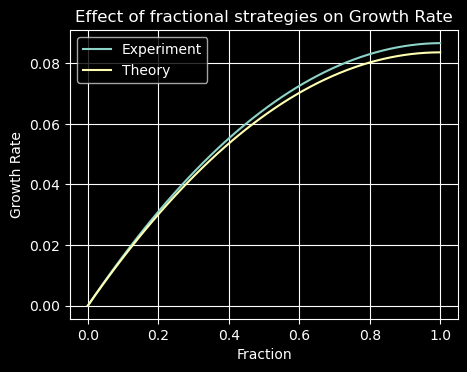

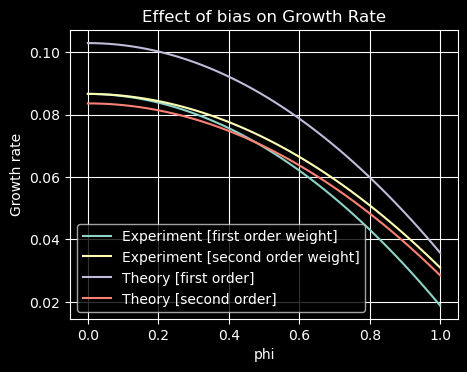

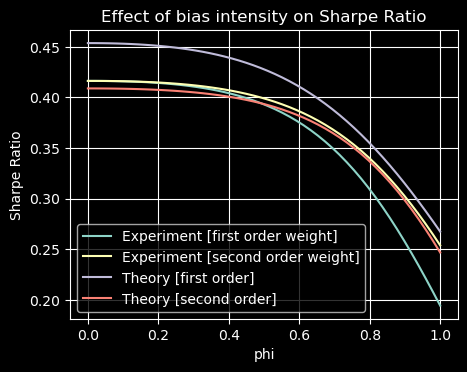

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

class LinearModel:
    def __init__(self, a, b, m, p, q):
        self.a, self.b, self.m, self.p, self.q = a, b, m, p, q
    
    def simulate(self, n:int):
        z = np.random.normal(m, np.sqrt(q), n)
        eps = np.random.normal(0, np.sqrt(p), n)
        x = a + b*z + eps
        return x,z
    
    def bet_weights(self, z):
        return (a + b*z)/(p+np.power(a+b*z,2))

    def g(self, second_order:bool = False):
        abm = self.a+self.b*self.m
        d = self.p + self.b**2 * self.q+abm**2
        g = self.b**2 * self.q + abm**2
        g /= d
        if second_order:
            g -= (2 * self.b**4 * self.q**2 + 4*abm**2 * self.b**2 * self.q)/(d**2)
            g += (2 * self.b**4 * self.q**2 + 4*abm**2 * self.b**2 * self.q)*(self.b**2 * self.q + abm**2)/(d**3)
        return g
    
    def growth_rate(self, second_order:bool = False):
        return 0.5*self.g(second_order)
    
    def sharpe(self, variance:bool = True, second_order:bool = False):
        if variance:
            return np.sqrt(self.g(second_order))
        else:
            tmp = self.g(second_order)
            return np.sqrt(tmp)/np.sqrt(1-tmp)
            
    def EzCov(self, second_order:bool = False):
        return self.p + self.b**2 * self.q + (self.a + self.b * self.m)**2
    
    def EzMu(self, second_order:bool = False):
        return self.a + self.b * self.m
    
    def EzW(self, second_order:bool = False):
        abm = self.a+self.b*self.m
        d = self.p + self.b**2 * self.q+abm**2
        v = abm / d
        if second_order:
            v -= 2 * abm * self.b**2 * self.q / (d**2)
            v += abm * (4 * abm**2 * self.b**2 * self.q + 2 * self.b**4 * self.q**2) / (d**3)
        return v
    
    def exp_growth_rate(self, s):
        return np.mean(s) - 0.5*np.mean(np.power(s,2))
    
    def exp_sharpe(self, s, variance:bool = True):
        if variance:
            return np.mean(s)/np.sqrt(np.mean(np.power(s,2))) 
        else:
            return np.mean(s)/np.std(s)
    
    def print(self, name:str, experiment:float, theory:float, theory_2: float = None, prec:int = 4):
        print(f'> {name}')
        print('  Experiment        : ', np.round(experiment, prec))
        print('  Theory            : ', np.round(theory, prec))
        if theory_2:            
            print('  Theory [2nd order]: ', np.round(theory_2, prec))
        print()

    def analysis(self, n):
        print('** Linear Model Analysis **')
        print(f'    z ~ N({self.m}, {self.q})')
        print(f'    e ~ N(0, {self.p})')
        print(f'    x = {self.a} + {self.b} z + e')
        print()
        
        # simulate process
        x, z = lm.simulate(n)
        # generate weights        
        w = self.bet_weights(z)
        # strategy
        s = w * x
        self.print('Growth Rate', self.exp_growth_rate(s), self.growth_rate(), self.growth_rate(True))
        self.print('Sharpe Ratio (variance)', self.exp_sharpe(s,True), self.sharpe(True,False), self.sharpe(True,True))  
        self.print('Sharpe Ratio (std)', self.exp_sharpe(s,False), self.sharpe(False,False), self.sharpe(False,True))  
        self.print('Weight Expected Value', np.mean(w), self.EzW(), self.EzW(True))  
        
        # concavity of growth rate on fractional strategies
        k = 50
        f = np.linspace(0 ,1, k)
        exp_gr_f = np.zeros(k)
        gr_f = np.zeros(k)
        for i in range(k):
            # betting weights (w is the same as above)
            s = f[i] * w * x    
            # growth rate calculations
            exp_gr_f[i] =  self.exp_growth_rate(s)
            gr_f[i] = self.g(True)*(f[i] - 0.5 * f[i]**2)
        
        plt.title('Effect of fractional strategies on Growth Rate')
        plt.plot(f, exp_gr_f, label = 'Experiment')
        plt.plot(f, gr_f, label = 'Theory')
        plt.legend()
        plt.grid(True)
        plt.xlabel('Fraction')
        plt.ylabel('Growth Rate')
        plt.show()              
        
        # effect of bias in performance metrix
        k = 50
        # phi domain
        phi = np.linspace(0, 1, k)
        
        # store results for growth rate
        exp_gr_phi_1 = np.zeros(k)
        exp_gr_phi_2 = np.zeros(k)
        gr_phi_1 = np.zeros(k) # first order
        gr_phi_2 = np.zeros(k) # second order
        # store results for sharpe
        exp_sr_phi_1 = np.zeros(k)
        exp_sr_phi_2 = np.zeros(k)
        sr_phi_1 = np.zeros(k) # first order
        sr_phi_2 = np.zeros(k) # second order
        
        # pre calculations
        g1, g2 = self.g(False), self.g(True)
        ezw1, ezw2 = self.EzW(False), self.EzW(True)
        ezm, ezc = self.EzMu(), self.EzCov()
        
        for i in range(k):
            # betting weights (w is the same as above)
            w1 = w - phi[i] * ezw1 # first order
            w2 = w - phi[i] * ezw2 # second order
            s1 = w1 * x
            s2 = w2 * x            
            # growth rate calculations
            exp_gr_phi_1[i] =  self.exp_growth_rate(s1)
            exp_gr_phi_2[i] =  self.exp_growth_rate(s2)
            gr_phi_1[i] = 0.5*(g1 - phi[i]**2 * ezw1**2 * ezc)
            gr_phi_2[i] = 0.5*(g2 - phi[i]**2 * ezw2**2 * ezc)
            # sharpe ratio calculations
            exp_sr_phi_1[i] =  self.exp_sharpe(s1)
            exp_sr_phi_2[i] =  self.exp_sharpe(s2)
            sr_phi_1[i] = (g1-phi[i]*ezw1*ezm)/np.sqrt(g1-2*phi[i]*ezw1*ezm+(phi[i]**2)*(ezw1**2)*ezc)
            sr_phi_2[i] = (g2-phi[i]*ezw2*ezm)/np.sqrt(g2-2*phi[i]*ezw2*ezm+(phi[i]**2)*(ezw2**2)*ezc)
        
        plt.title('Effect of bias on Growth Rate')
        plt.plot(phi, exp_gr_phi_1, label = 'Experiment [first order weight]')
        plt.plot(phi, exp_gr_phi_2, label = 'Experiment [second order weight]')
        plt.plot(phi, gr_phi_1, label = 'Theory [first order]')
        plt.plot(phi, gr_phi_2, label = 'Theory [second order]')
        plt.legend()
        plt.grid(True)
        plt.xlabel('phi')
        plt.ylabel('Growth rate')
        plt.show()
    
        plt.title('Effect of bias intensity on Sharpe Ratio')
        plt.plot(phi, exp_sr_phi_1, label = 'Experiment [first order weight]')
        plt.plot(phi, exp_sr_phi_2, label = 'Experiment [second order weight]')
        plt.plot(phi, sr_phi_1, label = 'Theory [first order]')
        plt.plot(phi, sr_phi_2, label = 'Theory [second order]')
        plt.legend()
        plt.grid(True)
        plt.xlabel('phi')
        plt.ylabel('Sharpe Ratio')
        plt.show()        
        


n = 10000
# ** PARAMETERS **
# z mean
m = 0.1
# z variance
q = 0.1
# bias
a = 0.1
# correlation feature target
b = 0.3
# noise variance
p = 0.1
lm = LinearModel(a, b, m, p, q)
lm.analysis(n)